In [2]:
%load_ext autoreload
%autoreload 2

from models import Detr
from utils import load_config
import torch

torch.cuda.empty_cache()

config = load_config(r"C:\Users\tangy\Downloads\DETR-GFTE\configs\train.yaml")

model = Detr(
    lr=1e-4,
    lr_backbone=1e-5,
    weight_decay=1e-4,
    pretrained='facebook/detr-resnet-101-dc5',
    checkpoint = None,
    config=config)
model.train()

device = torch.device('cuda:0')
model.to(device)
# batch = next(iter(model.train_loader))
# outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

Some weights of the model checkpoint at facebook/detr-resnet-101-dc5 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model chec

Detr(
  (model): DetrForObjectDetection(
    (model): DetrModel(
      (backbone): DetrConvModel(
        (conv_encoder): DetrConvEncoder(
          (model): FeatureListNet(
            (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
            (bn1): DetrFrozenBatchNorm2d()
            (act1): ReLU(inplace=True)
            (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
            (layer1): Sequential(
              (0): Bottleneck(
                (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn1): DetrFrozenBatchNorm2d()
                (act1): ReLU(inplace=True)
                (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn2): DetrFrozenBatchNorm2d()
                (drop_block): Identity()
                (act2): ReLU(inplace=True)
                (aa): Identity()
                (conv3): Conv2d(64, 256

In [3]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning import Trainer

logger = TensorBoardLogger("lightning_logs", name="DETR_pretraining_02")

# Set up checkpointing and trainer
checkpoint_callback = ModelCheckpoint(
    monitor="validation/loss",
    filename="detr-{epoch:02d}-{validation/loss:.2f}",
    save_top_k=3,
    mode="min",
    save_last=True,
    dirpath=r"C:\Users\tangy\Downloads\DETR-GFTE\checkpoints"
)

trainer = Trainer(
    max_epochs=50,
    log_every_n_steps=10,
    callbacks=[checkpoint_callback],
    val_check_interval=0.5,  # Run validation 2 times per epoch
    devices=1,
    accelerator="gpu",
    gradient_clip_val=0.1,
    accumulate_grad_batches=48
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [4]:
# pytorch_lightning >= 2.0.0


trainer.fit(model)

You are using a CUDA device ('NVIDIA GeForce RTX 4070 Ti SUPER') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
c:\Users\tangy\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:652: Checkpoint directory C:\Users\tangy\Downloads\DETR-GFTE\checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                   | Params | Mode 
---------------------------------------------------------
0 | model | DetrForObjectDetection | 60.4 M | train
---------------------------------------------------------
60.2 M    Trainable params
222 K     Non-trainable params
60.4 M    Total params
241.767   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\tangy\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\tangy\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Users\tangy\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

: 

In [1]:
%load_ext autoreload
%autoreload 2

from models import Detr
from utils import load_config
import torch

config = load_config(r"C:\Users\tangy\Downloads\DETR-GFTE\configs\train.yaml")

model = Detr(
    lr=1e-4,
    lr_backbone=1e-5,
    weight_decay=1e-4,
    pretrained='facebook/detr-resnet-50',
    checkpoint = r"C:\Users\tangy\Downloads\DETR-GFTE\checkpoints\detr-epoch=01-validation\DETRR50_AGB8_loss=0.67.ckpt",
    config=config)
model.eval()

device = torch.device('cuda:0')
model.to(device)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoin

Detr(
  (model): DetrForObjectDetection(
    (model): DetrModel(
      (backbone): DetrConvModel(
        (conv_encoder): DetrConvEncoder(
          (model): FeatureListNet(
            (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
            (bn1): DetrFrozenBatchNorm2d()
            (act1): ReLU(inplace=True)
            (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
            (layer1): Sequential(
              (0): Bottleneck(
                (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn1): DetrFrozenBatchNorm2d()
                (act1): ReLU(inplace=True)
                (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn2): DetrFrozenBatchNorm2d()
                (drop_block): Identity()
                (act2): ReLU(inplace=True)
                (aa): Identity()
                (conv3): Conv2d(64, 256

torch.Size([1, 100, 256]) torch.Size([1, 100, 4])


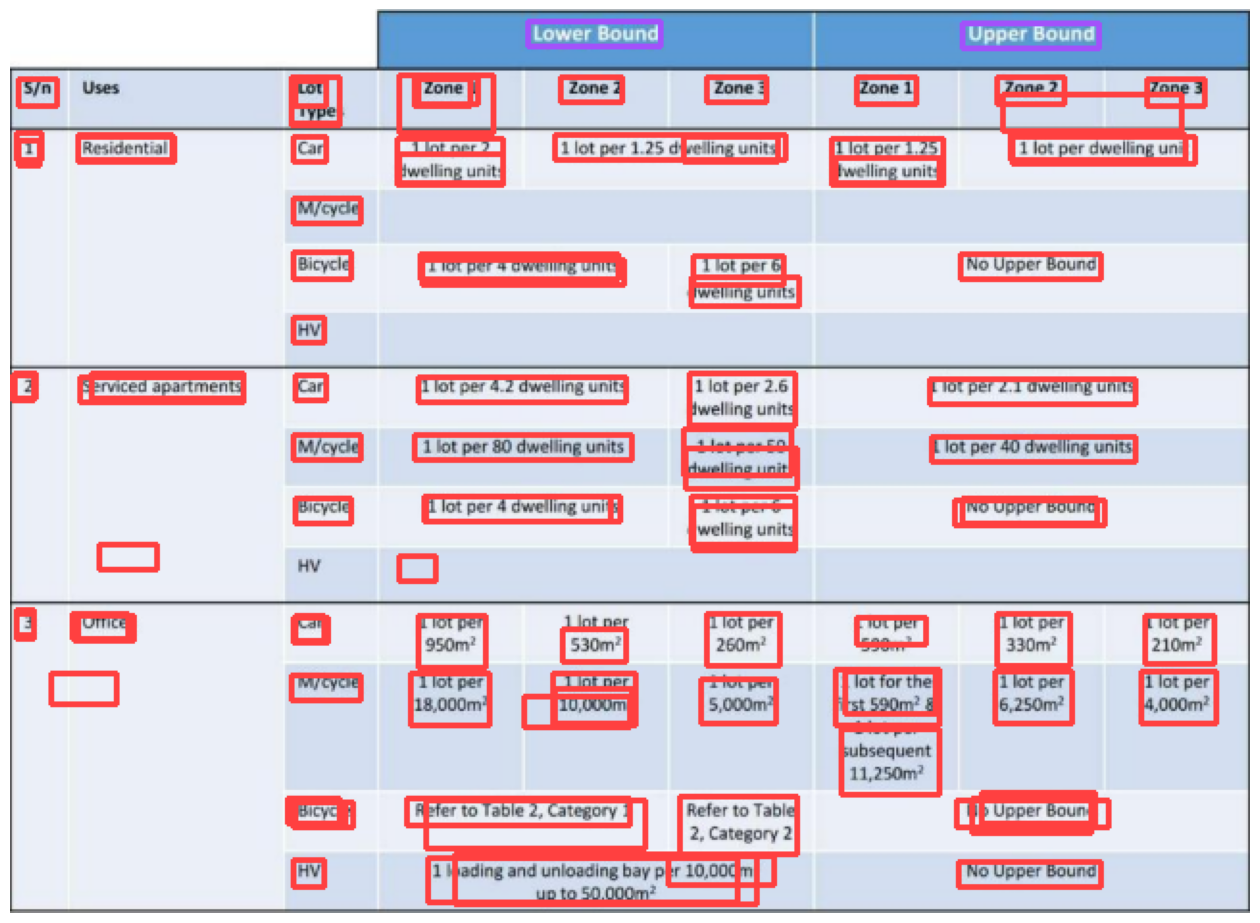

In [14]:
import cv2
import supervision as sv

with torch.no_grad():
    # load image and predict
    image = cv2.imread(r"C:\Users\tangy\Downloads\unitable-main\dataset\lta_eval\PDF02.PNG")
    inputs = model.image_processor(images=image, return_tensors='pt').to(device)
    outputs = model(**inputs)

    print(outputs.last_hidden_state.shape, outputs.pred_boxes.shape)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(device)
    results = model.image_processor.post_process_object_detection(
        outputs=outputs, 
        threshold=0, 
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results)
# box_annotator = sv.BoxAnnotator()
# frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections)

%matplotlib inline
sv.plot_image(frame, (16, 16))

# decoder output hidden states: torch.Size([1, 100, 256])
# predicted bboxes: torch.Size([1, 100, 4])